In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

### Part 1: Understanding Product Categories

In [36]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,price_category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Low
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers,Low
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Low
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,Low
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers,Low
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers,Low
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers,Low
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers,Low
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers,Low
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers,Low


In [5]:
df.shape

(2443651, 9)

In [6]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [7]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')]

In [8]:
df.select_dtypes("number").columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [9]:
df.select_dtypes("number").nunique().sort_values(ascending=False)

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [10]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 50]
potential_categorical_from_numerical

,stars,boughtInLastMonth
0,4.7,0
1,4.7,0
2,4.7,0
3,4.7,0
4,4.6,0
...,...,...
2443646,0.0,0
2443647,0.0,0
2443648,0.0,0
2443649,4.3,0


In [11]:
df['isBestSeller'] = df['isBestSeller'].astype('object')

In [12]:
df.select_dtypes("object").columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [13]:
df.select_dtypes("object").nunique().sort_values(ascending=False)

asin            2222742
title           2077591
category            296
isBestSeller          2
dtype: int64

In [14]:
df_categorical = pd.concat([df.select_dtypes('object'), potential_categorical_from_numerical], axis=1)
df_categorical

,asin,title,isBestSeller,category,stars,boughtInLastMonth
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers,4.7,0
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers,4.7,0
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers,4.7,0
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",False,Hi-Fi Speakers,4.7,0
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,False,Hi-Fi Speakers,4.6,0
...,...,...,...,...,...,...
2443646,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",False,Motorbike Clothing,0.0,0
2443647,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,False,Motorbike Clothing,0.0,0
2443648,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,False,Motorbike Clothing,0.0,0
2443649,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,False,Motorbike Clothing,4.3,0


In [15]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

What are the most popular product categories on Amazon UK and how do they compare in terms of listing frequency?

In [16]:
frequency_table = df['category'].value_counts().head(5)
proportion_table = df['category'].value_counts(normalize=True).head(5)
frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

<Axes: xlabel='category'>

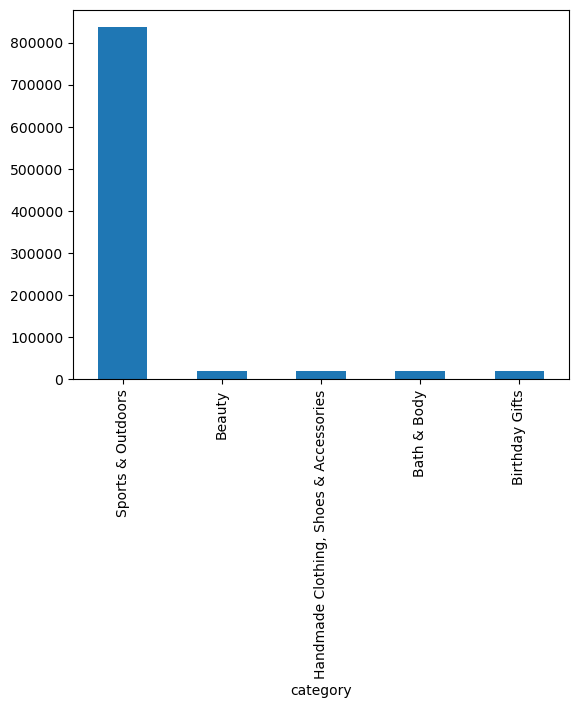

In [17]:
frequency_table.plot.bar()

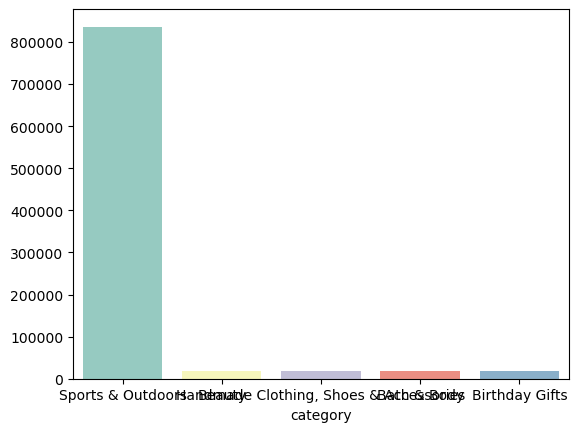

In [18]:
ax = sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

The top 5 most listed product categories are: Sports&outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body, Birthday Gifts. Though the vast majority of products belong to Sports&outdoors category.

<Axes: ylabel='count'>

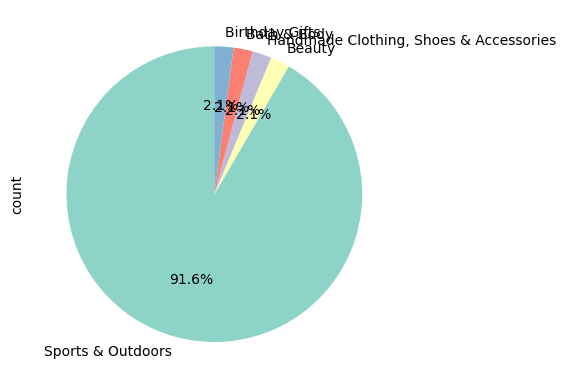

In [19]:
# Create the pie chart
df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

### Part 2: Delving into Product Pricing

**Measures of Centrality**

In [20]:
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]

mean, median, mode

(89.24380943923663, 19.09, 9.99)

In [21]:
avg_price_point = df['price'].sum()/df['uid'].count()
avg_price_point

89.24380943923663

The average price point (mean) varies a lot from the most common price point (mode) which may indicate the following: the data distribution is skewed, there is an outliers or non-normal distribution.
The most frequent (mode)  price is $9.99. This value appears more frequently than any other price in the dataset.

In [22]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


**Measures of Dispersion**

In [23]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

There is a high extent of prices variation from their mean. On average the prices deviate from the mean price for about 345.60 (some prices are much higher or lower than average)

How varied are the product prices? Are there any indicators of a significant spread in prices?

In [25]:
skewness_price = df['price'].skew()
kurtosis_price = df['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

Skewness: The positive value of skewness 27.49 for the 'price' indicates that the distribution is right-skewed.  This suggests that there are a significant number of products that are have at higher prices, which are acting as outliers and pulling the mean upwards.

Kurtosis: The kurtosis value of 4241.62 is greater than 3, which indicates that the 'price' distribution has heavier tails

<Axes: xlabel='price', ylabel='Count'>

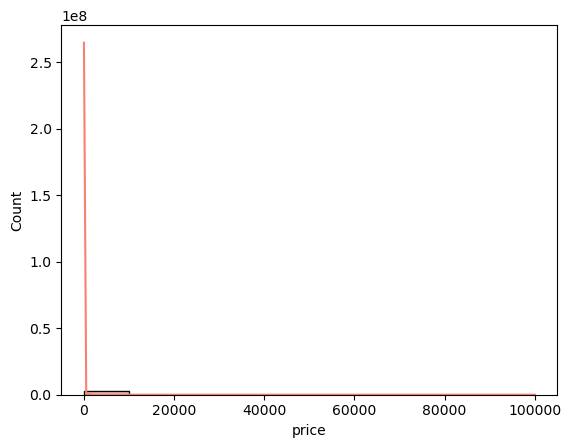

In [26]:
sns.histplot(df['price'], kde=True, bins=10, color="salmon")

<Axes: >

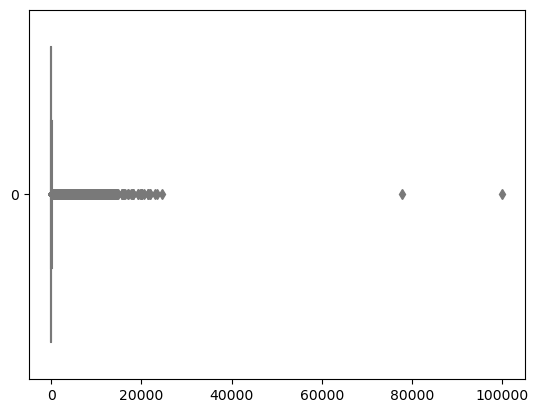

In [27]:
sns.boxplot(data = df['price'], color="lightblue", orient='h')

These visualizations exphasize the presence of outliers in the higher price range.

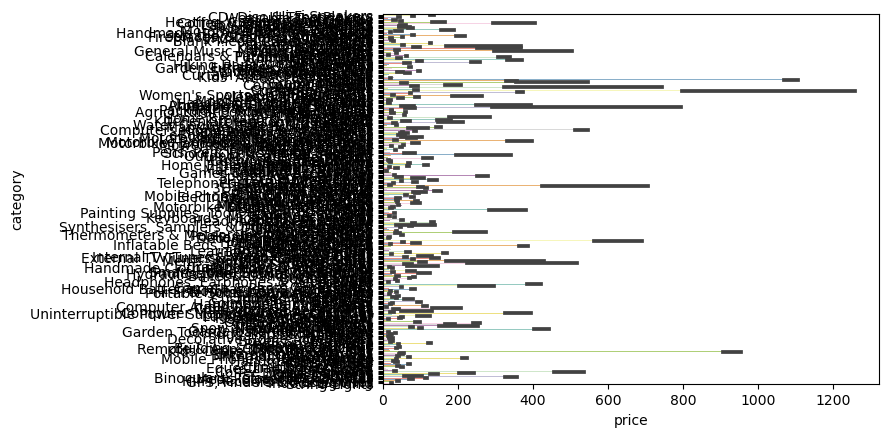

In [28]:
sns.barplot(x=df['price'], y=df['category'], palette="Set3");

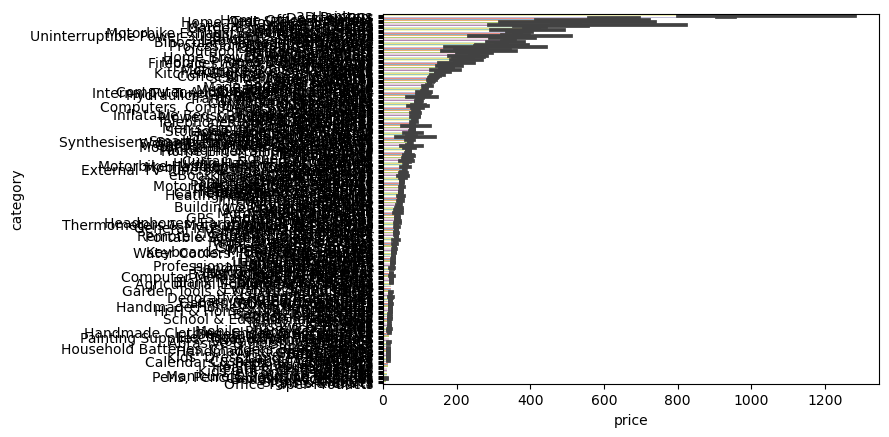

In [29]:
sns.barplot(x=df['price'], y=df['category'], data=df, palette="Set3", 
            order=df.groupby('category')['price'].mean().sort_values(ascending=False).index);


In [30]:
# Discretizing 'price' into 4 categories
bins = [0, 1000, 25000, 50000, df['price'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [31]:
df.price_category.value_counts()

price_category
Low          2404537
Medium         39112
Very High          2
High               0
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='price_category'>

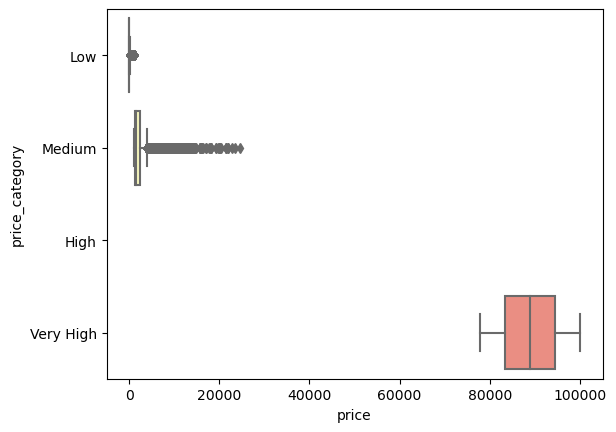

In [32]:
sns.boxplot(data=df, x='price', y='price_category', palette="Set3")

### Part 3: Unpacking Product Ratings

**Measures of Centrality**

In [33]:
mean = df['stars'].mean()
median = df['stars'].median()
mode = df['stars'].mode()[0]

mean, median, mode

(2.152836472966065, 0.0, 0.0)

In majority customers do not rate the products (mode is 0.0)

In [40]:
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_star = df['stars'].min()
max_star = df['stars'].max()
range_stars = max_star - min_star
quantiles_stars= df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_star, max_star, range_stars, quantiles_stars

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

The ratings are quite consistent, the variation in customer feedback is not wide

In [41]:
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

The distribution is less peaked to normal distribution (kurtosis is negative)

<Axes: xlabel='stars', ylabel='Count'>

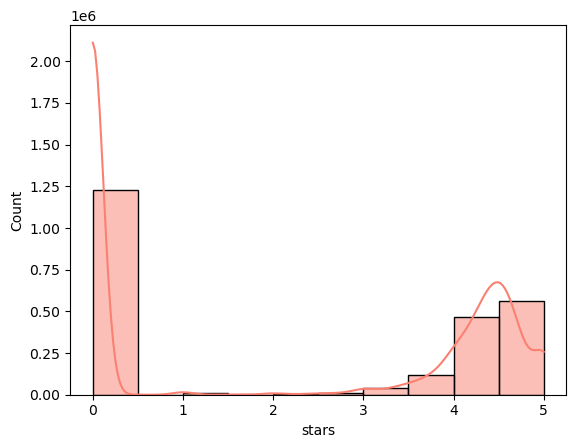

In [42]:
sns.histplot(df['stars'], kde=True, bins=10, color="salmon")